##### Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

##### Criando a URL usada na requisição

In [2]:
BASE_URL = 'https://api.eia.gov/v2/'
ENDPOINT = 'steo/data/'
API_KEY = input('Digite sua api key: ')

params = {
    "api_key": f"{API_KEY}",
    "frequency": "monthly",
    "data[0]": ["value"],
    "facets[seriesId][]":['ZOTOIUS','QSIC_CL','QSIC_DF','QSIC_DF_PCT','QSIC_EL','QSIC_NG','QSIC_NG_PCT'],
    "start": None, # formato "YYYY-MM-DD"
    "end": None, # formato "YYYY-MM-DD"
    "sort[0][column]": ["period"],
    "sort[0][direction]": ["desc"],
    "offset": 0,
    "length": 5000
}

url = BASE_URL + ENDPOINT

In [3]:
response = requests.get(url, params=params)
response.status_code

200

In [4]:
data = response.json()

In [5]:
data['response']['data']

[{'period': '2026-12',
  'seriesId': 'QSIC_CL',
  'seriesDescription': 'Coal-weighted Industrial Production Index',
  'value': '94.51382',
  'unit': 'Index, 2017=100'},
 {'period': '2026-12',
  'seriesId': 'QSIC_NG',
  'seriesDescription': 'Natural Gas-weighted Industrial Production Index',
  'value': '94.81374',
  'unit': 'Index, 2017=100'},
 {'period': '2026-12',
  'seriesId': 'QSIC_NG_PCT',
  'seriesDescription': 'Natural Gas-weighted Industrial Production Index',
  'value': '-.2825344',
  'unit': 'Percent change from prior year'},
 {'period': '2026-12',
  'seriesId': 'ZOTOIUS',
  'seriesDescription': 'Total Industrial Production Index',
  'value': '103.4596',
  'unit': 'Index, 2017=100 (seasonally adjusted)'},
 {'period': '2026-12',
  'seriesId': 'QSIC_EL',
  'seriesDescription': 'Electricity-weighted Industrial Production Index',
  'value': '97.35838',
  'unit': 'Index, 2017=100'},
 {'period': '2026-12',
  'seriesId': 'QSIC_DF_PCT',
  'seriesDescription': 'Distillate-weighted Indu

In [6]:
industrial_prod = pd.DataFrame(data['response']['data']).sort_values(by=['seriesId','period'],ascending=False)
industrial_prod.head()

,period,seriesId,seriesDescription,value,unit
3,2026-12,ZOTOIUS,Total Industrial Production Index,103.4596,"Index, 2017=100 (seasonally adjusted)"
10,2026-11,ZOTOIUS,Total Industrial Production Index,103.3664,"Index, 2017=100 (seasonally adjusted)"
17,2026-10,ZOTOIUS,Total Industrial Production Index,103.2765,"Index, 2017=100 (seasonally adjusted)"
24,2026-09,ZOTOIUS,Total Industrial Production Index,103.1987,"Index, 2017=100 (seasonally adjusted)"
31,2026-08,ZOTOIUS,Total Industrial Production Index,103.1093,"Index, 2017=100 (seasonally adjusted)"


In [7]:
industrial_prod.tail()

,period,seriesId,seriesDescription,value,unit
3073,1990-05,QSIC_CL,Coal-weighted Industrial Production Index,93.799582939,"Index, 2017=100"
3080,1990-04,QSIC_CL,Coal-weighted Industrial Production Index,94.29066207,"Index, 2017=100"
3087,1990-03,QSIC_CL,Coal-weighted Industrial Production Index,94.141539875,"Index, 2017=100"
3094,1990-02,QSIC_CL,Coal-weighted Industrial Production Index,94.06177517,"Index, 2017=100"
3101,1990-01,QSIC_CL,Coal-weighted Industrial Production Index,93.820312147,"Index, 2017=100"


In [8]:
industrial_prod.period = pd.to_datetime(industrial_prod.period)
industrial_prod.value = pd.to_numeric(industrial_prod.value)

In [9]:
industrial_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3108 entries, 3 to 3101
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period             3108 non-null   datetime64[ns]
 1   seriesId           3108 non-null   object        
 2   seriesDescription  3108 non-null   object        
 3   value              3108 non-null   float64       
 4   unit               3108 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 145.7+ KB


<Axes: xlabel='period'>

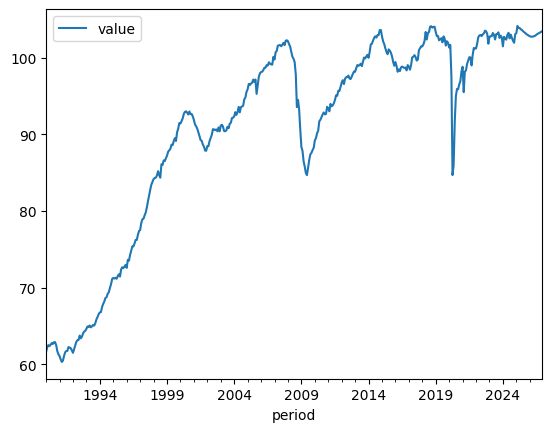

In [67]:
industrial_prod[industrial_prod.seriesId=='ZOTOIUS'].plot(x='period', y='value')

In [20]:
new_df =  (industrial_prod
    .drop(['seriesId','unit'], axis=1)
    .pivot_table(
        index=['period'],
        values='value',
        columns='seriesDescription'
    ).reset_index())

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   period                                            444 non-null    datetime64[ns]
 1   Coal-weighted Industrial Production Index         444 non-null    float64       
 2   Distillate-weighted Industrial Production Index   444 non-null    float64       
 3   Electricity-weighted Industrial Production Index  444 non-null    float64       
 4   Natural Gas-weighted Industrial Production Index  444 non-null    float64       
 5   Total Industrial Production Index                 444 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 20.9 KB


<Axes: xlabel='period'>

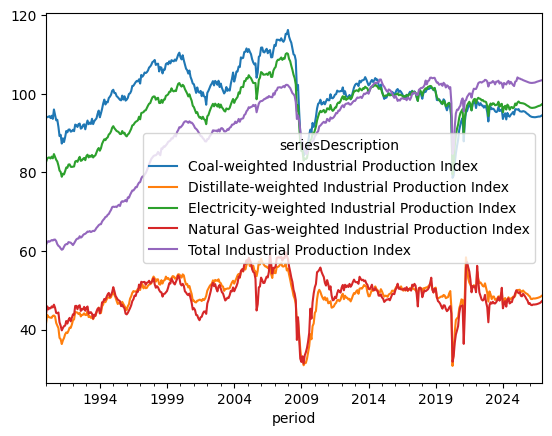

In [23]:
new_df.plot(x='period', legend=True)

In [24]:
new_df.head()

seriesDescription,period,Coal-weighted Industrial Production Index,Distillate-weighted Industrial Production Index,Electricity-weighted Industrial Production Index,Natural Gas-weighted Industrial Production Index,Total Industrial Production Index
0,1990-01-01,93.820312,41.706976,82.692874,44.060496,61.6352
1,1990-02-01,94.061775,43.735970,83.502984,45.894211,62.1951
2,1990-03-01,94.141540,43.233468,83.747235,45.119697,62.4916
3,1990-04-01,94.290662,43.091780,83.779684,45.489080,62.3511
4,1990-05-01,93.799583,43.008513,83.517388,45.382550,62.5353


In [37]:
df_diff = new_df.set_index('period').apply('diff', axis=0)

In [38]:
df_diff.head()

seriesDescription,Coal-weighted Industrial Production Index,Distillate-weighted Industrial Production Index,Electricity-weighted Industrial Production Index,Natural Gas-weighted Industrial Production Index,Total Industrial Production Index
period,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN
1990-02-01,0.241463,2.028994,0.810110,1.833716,0.5599
1990-03-01,0.079765,-0.502502,0.244252,-0.774515,0.2965
1990-04-01,0.149122,-0.141688,0.032449,0.369384,-0.1405
1990-05-01,-0.491079,-0.083268,-0.262295,-0.106531,0.1842


In [42]:
df_diff.shape

(444, 5)

<Axes: xlabel='Distillate-weighted Industrial Production Index', ylabel='Total Industrial Production Index'>

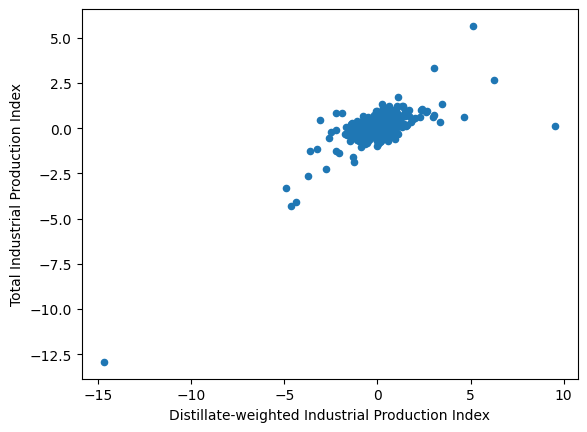

In [39]:
df_diff.plot(x='Distillate-weighted Industrial Production Index',
            y='Total Industrial Production Index',
            kind='scatter'
            )

In [44]:
df_diff_sem_outlier = df_diff[df_diff['Distillate-weighted Industrial Production Index'] > -10]

In [45]:
df_diff_sem_outlier.shape

(442, 5)

In [46]:
df_diff_sem_outlier.head()

seriesDescription,Coal-weighted Industrial Production Index,Distillate-weighted Industrial Production Index,Electricity-weighted Industrial Production Index,Natural Gas-weighted Industrial Production Index,Total Industrial Production Index
period,,,,,
1990-02-01,0.241463,2.028994,0.810110,1.833716,0.5599
1990-03-01,0.079765,-0.502502,0.244252,-0.774515,0.2965
1990-04-01,0.149122,-0.141688,0.032449,0.369384,-0.1405
1990-05-01,-0.491079,-0.083268,-0.262295,-0.106531,0.1842
1990-06-01,0.600696,-0.031682,0.473074,0.497965,0.2126


<Axes: xlabel='Distillate-weighted Industrial Production Index', ylabel='Total Industrial Production Index'>

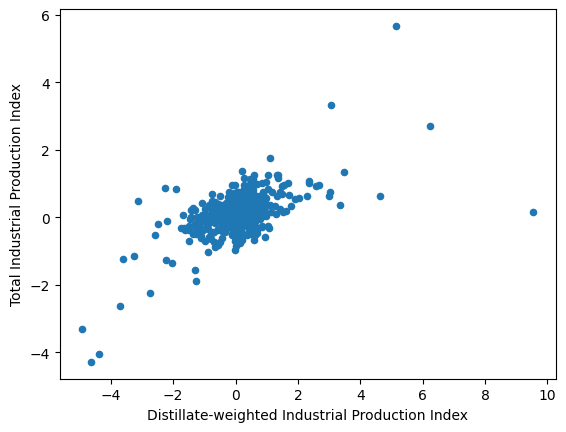

In [47]:
df_diff_sem_outlier.plot(
    x='Distillate-weighted Industrial Production Index',
    y='Total Industrial Production Index',
    kind='scatter'
    )

<Axes: xlabel='period'>

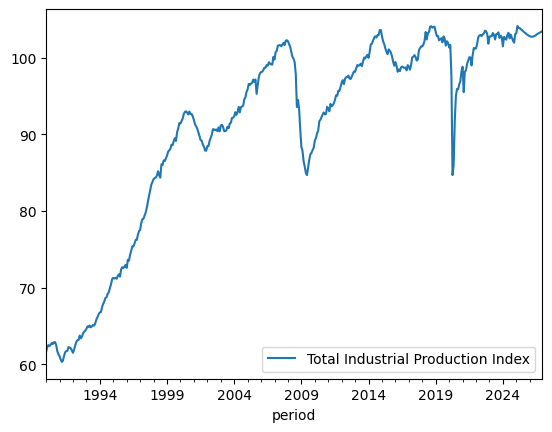

In [36]:
new_df.plot(x='period', y='Total Industrial Production Index')